# **American Sign Language (ASL) Real-Time Detection 🤟**
## **Part 1 - Training**

## **0.** Settings

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Install Yolov5
!git clone https://github.com/ultralytics/yolov5
%cd ./yolov5
!pip install -r requirements.txt

In [3]:
from IPython.display import Image, display
import torch
import glob

# Fix a seed for PyTorch
torch.manual_seed(4200);

## ===========================
##   GPU
## ===========================

gpu = True

if gpu == True:
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

## **1.** Dataset

In [ ]:
%cd ../
!curl -L 'https://public.roboflow.com/ds/..key=..' > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [6]:
!more data.yaml

train: ../train/images
val: ../valid/images

nc: 26
names: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O
', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


## **2.** Training

In [7]:
!python /content/yolov5/train.py --img 448 --batch 64 --epochs 500 --data /content/data.yaml --weights yolov5s.pt --workers 8

train: weights=yolov5s.pt, cfg=, data=/content/data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=64, imgsz=448, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-307-g92e47b8 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, 

## **3.** Validation

In [8]:
!python /content/yolov5/val.py --weights /content/yolov5/runs/train/exp/weights/best.pt --data /content/data.yaml --img 448

val: data=/content/data.yaml, weights=['/content/yolov5/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=448, conf_thres=0.001, iou_thres=0.6, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-307-g92e47b8 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7080247 parameters, 0 gradients, 16.0 GFLOPs
val: Scanning '/content/yolov5/../valid/labels.cache' images and labels... 144 found, 0 missing, 0 empty, 0 corrupt: 100% 144/144 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 5/5 [00:03<00:00,  1.53it/s]
                 all        144        144        0.9      0.867      0.954      0.775
                   A        144          5          1      0.839      0.995      0.864
         

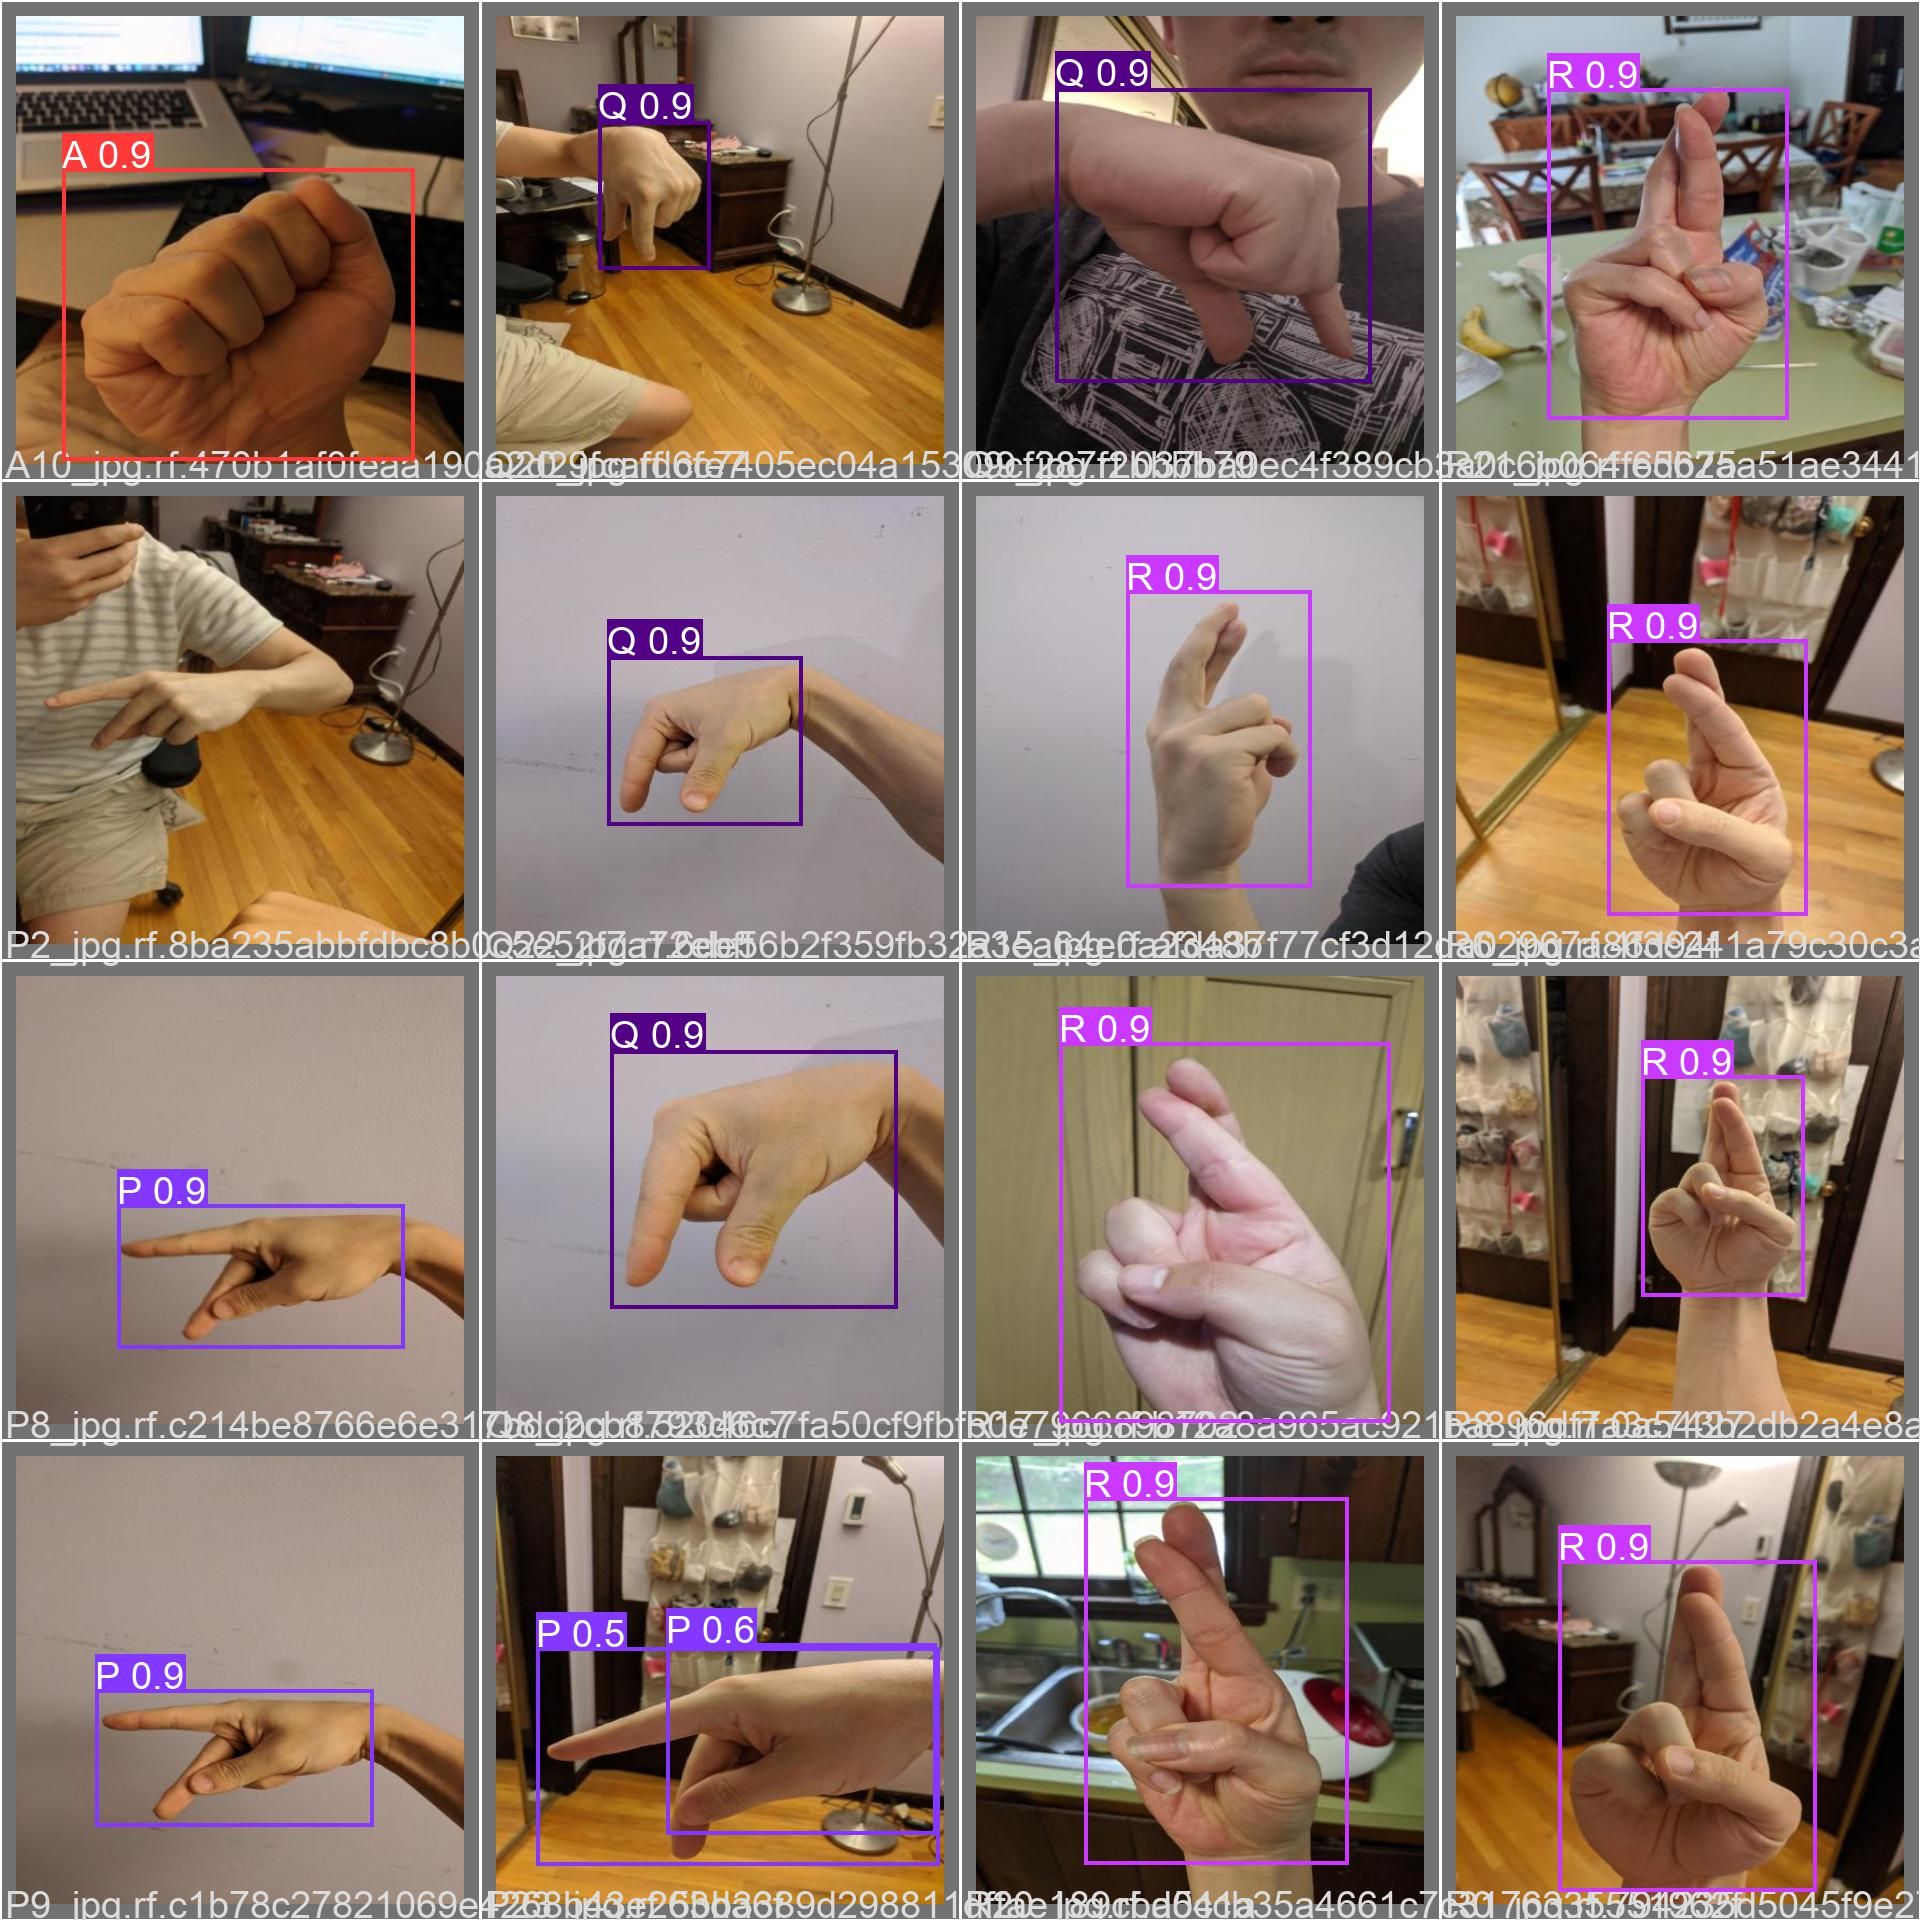

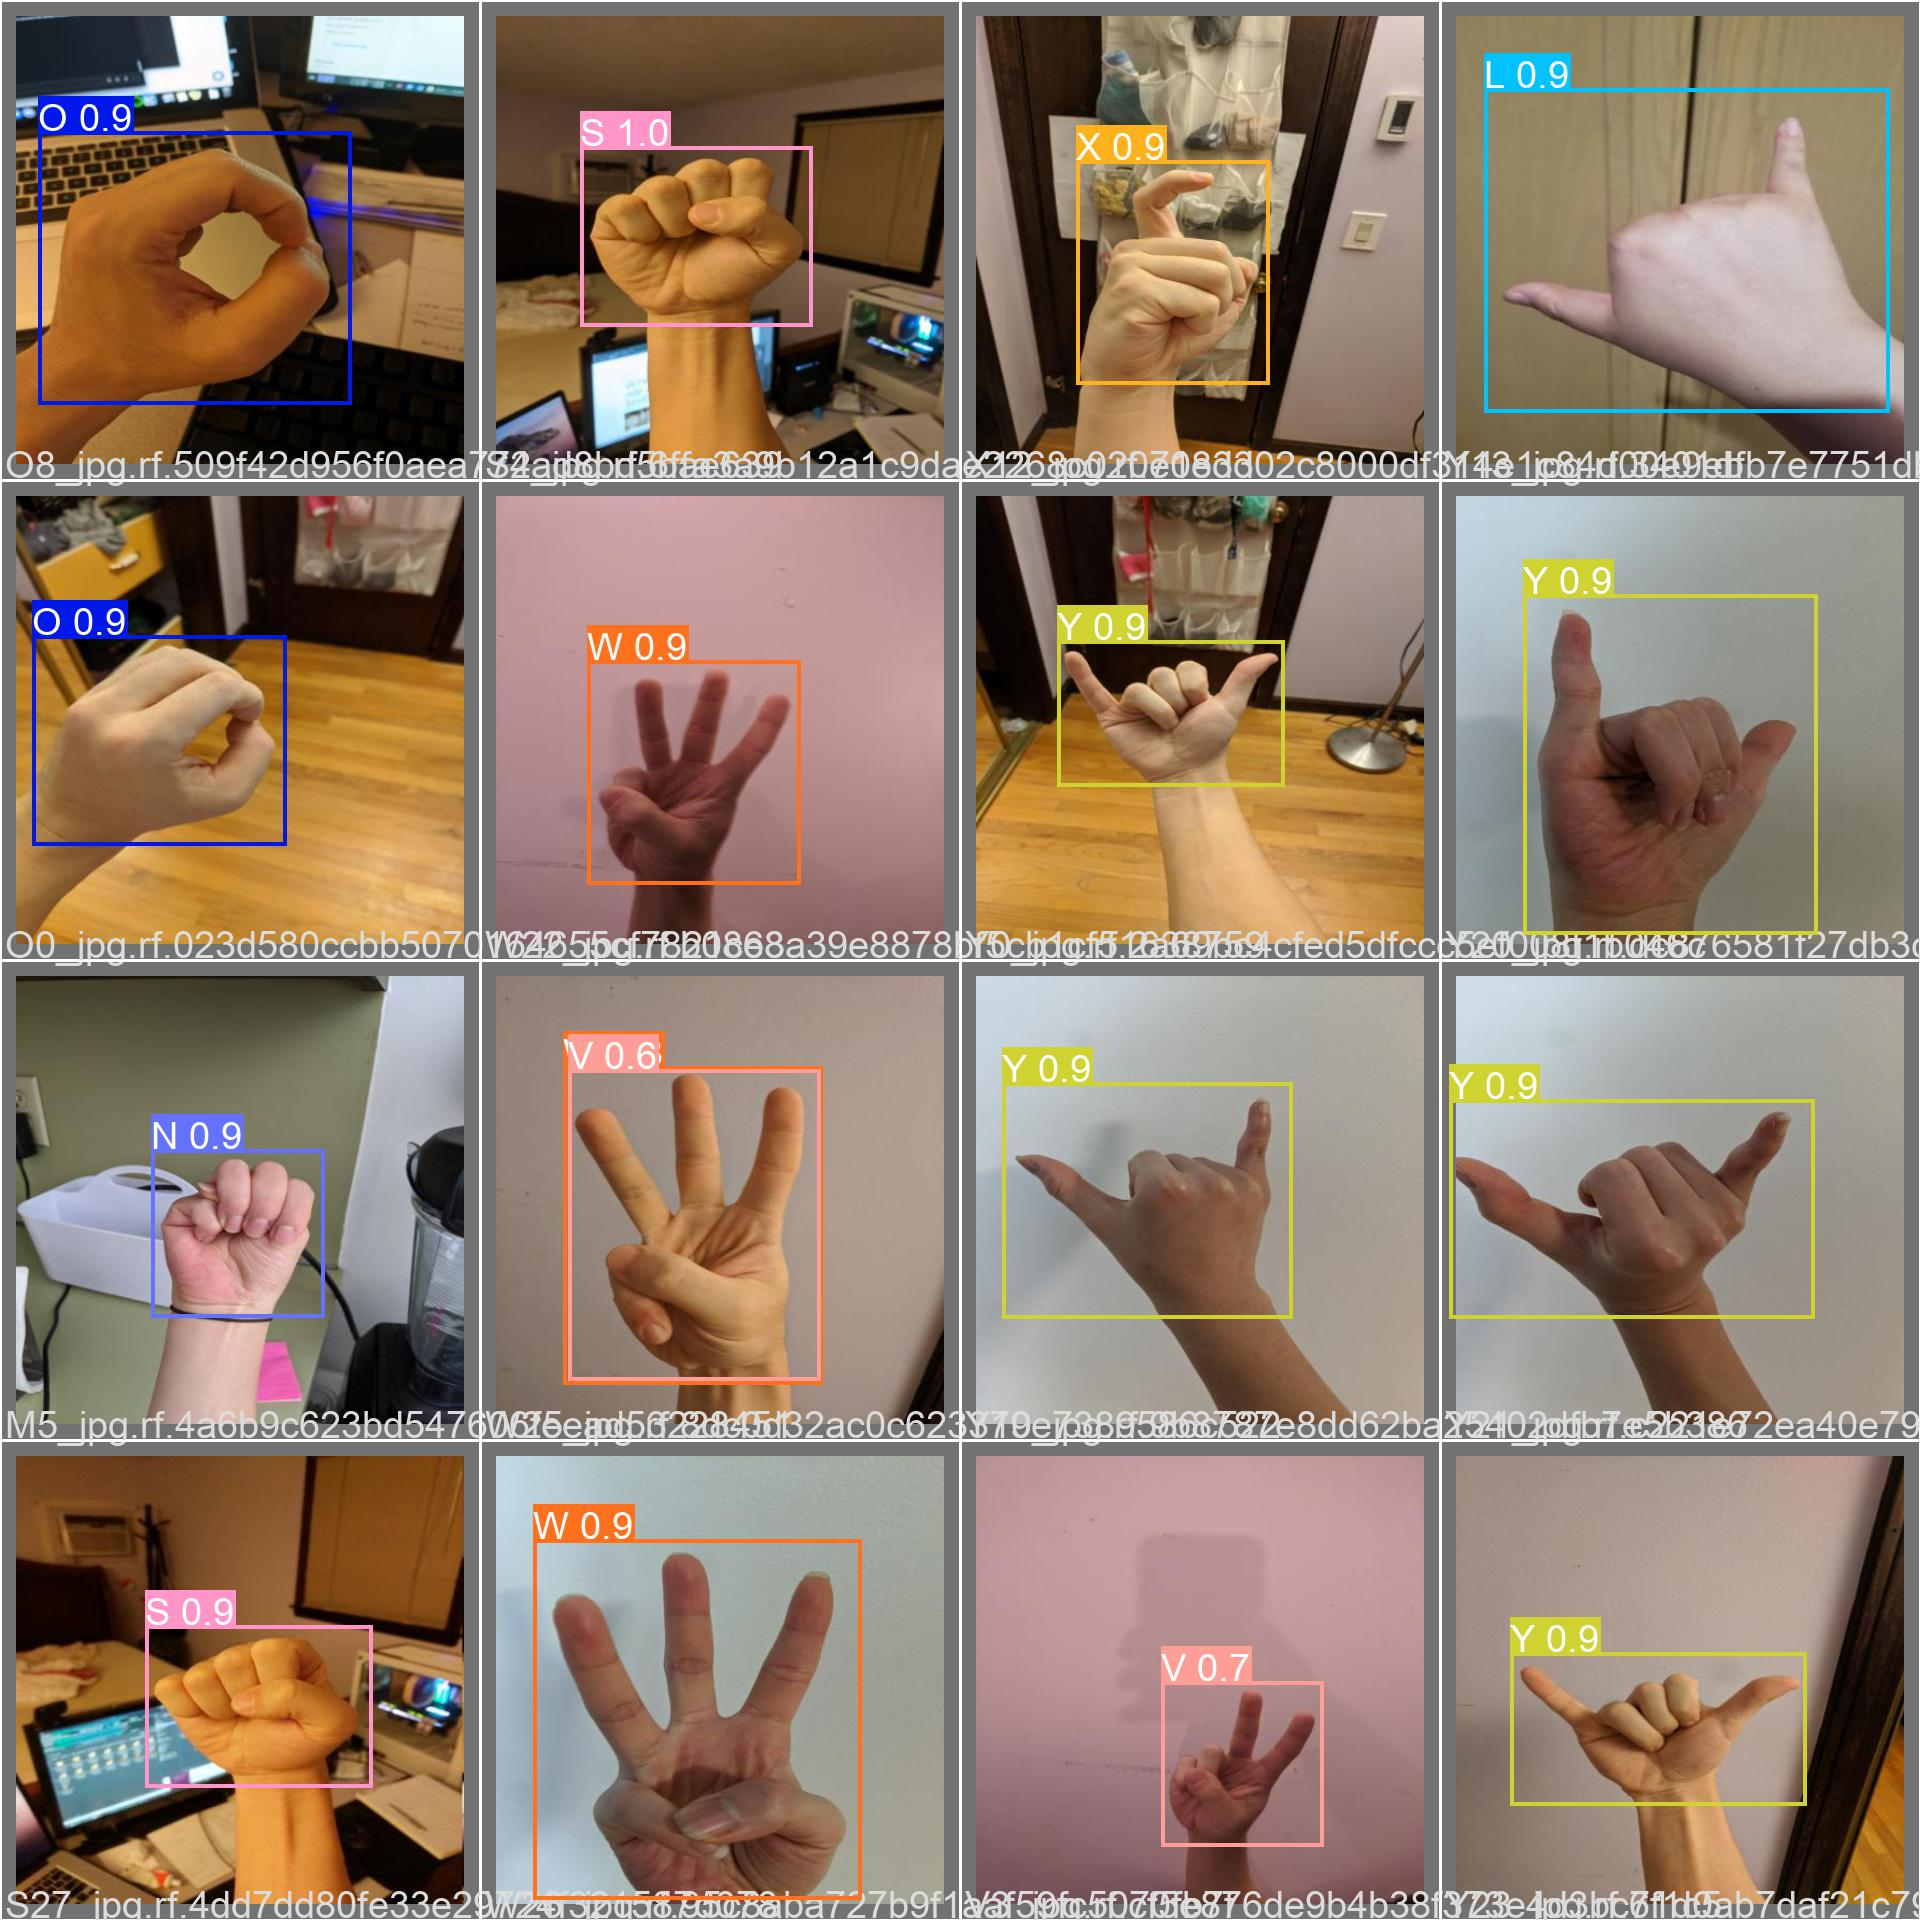

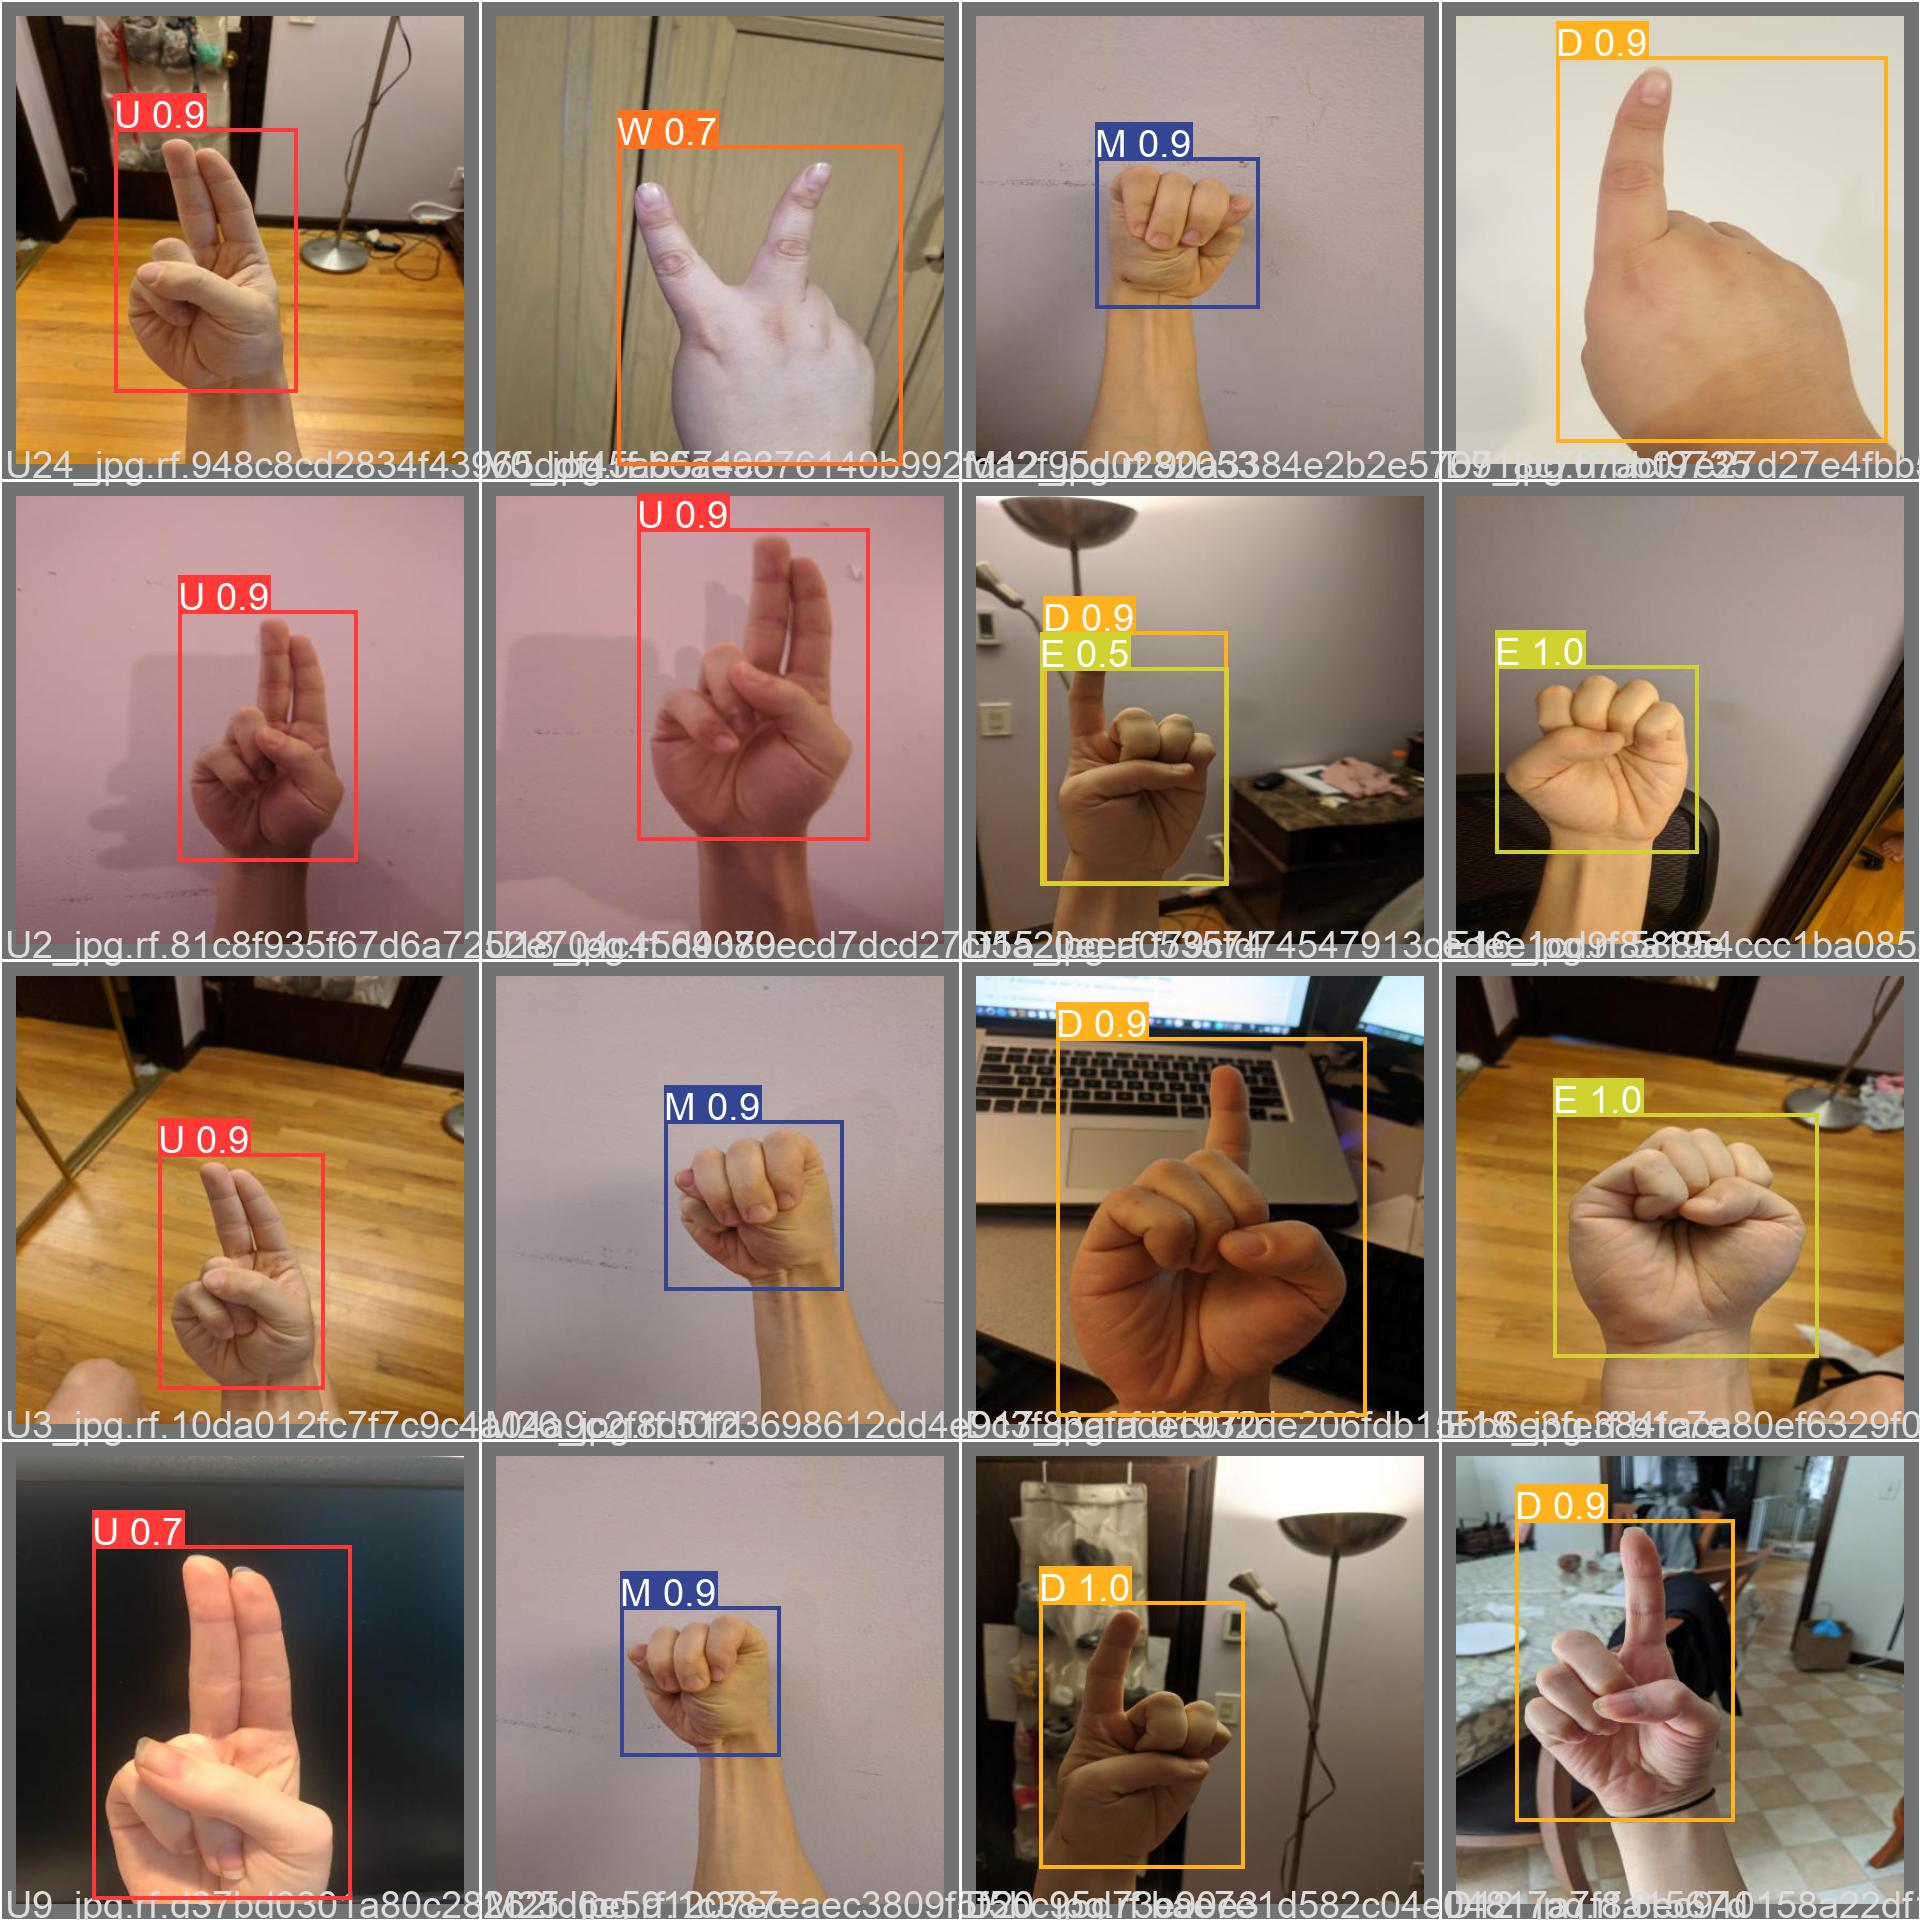

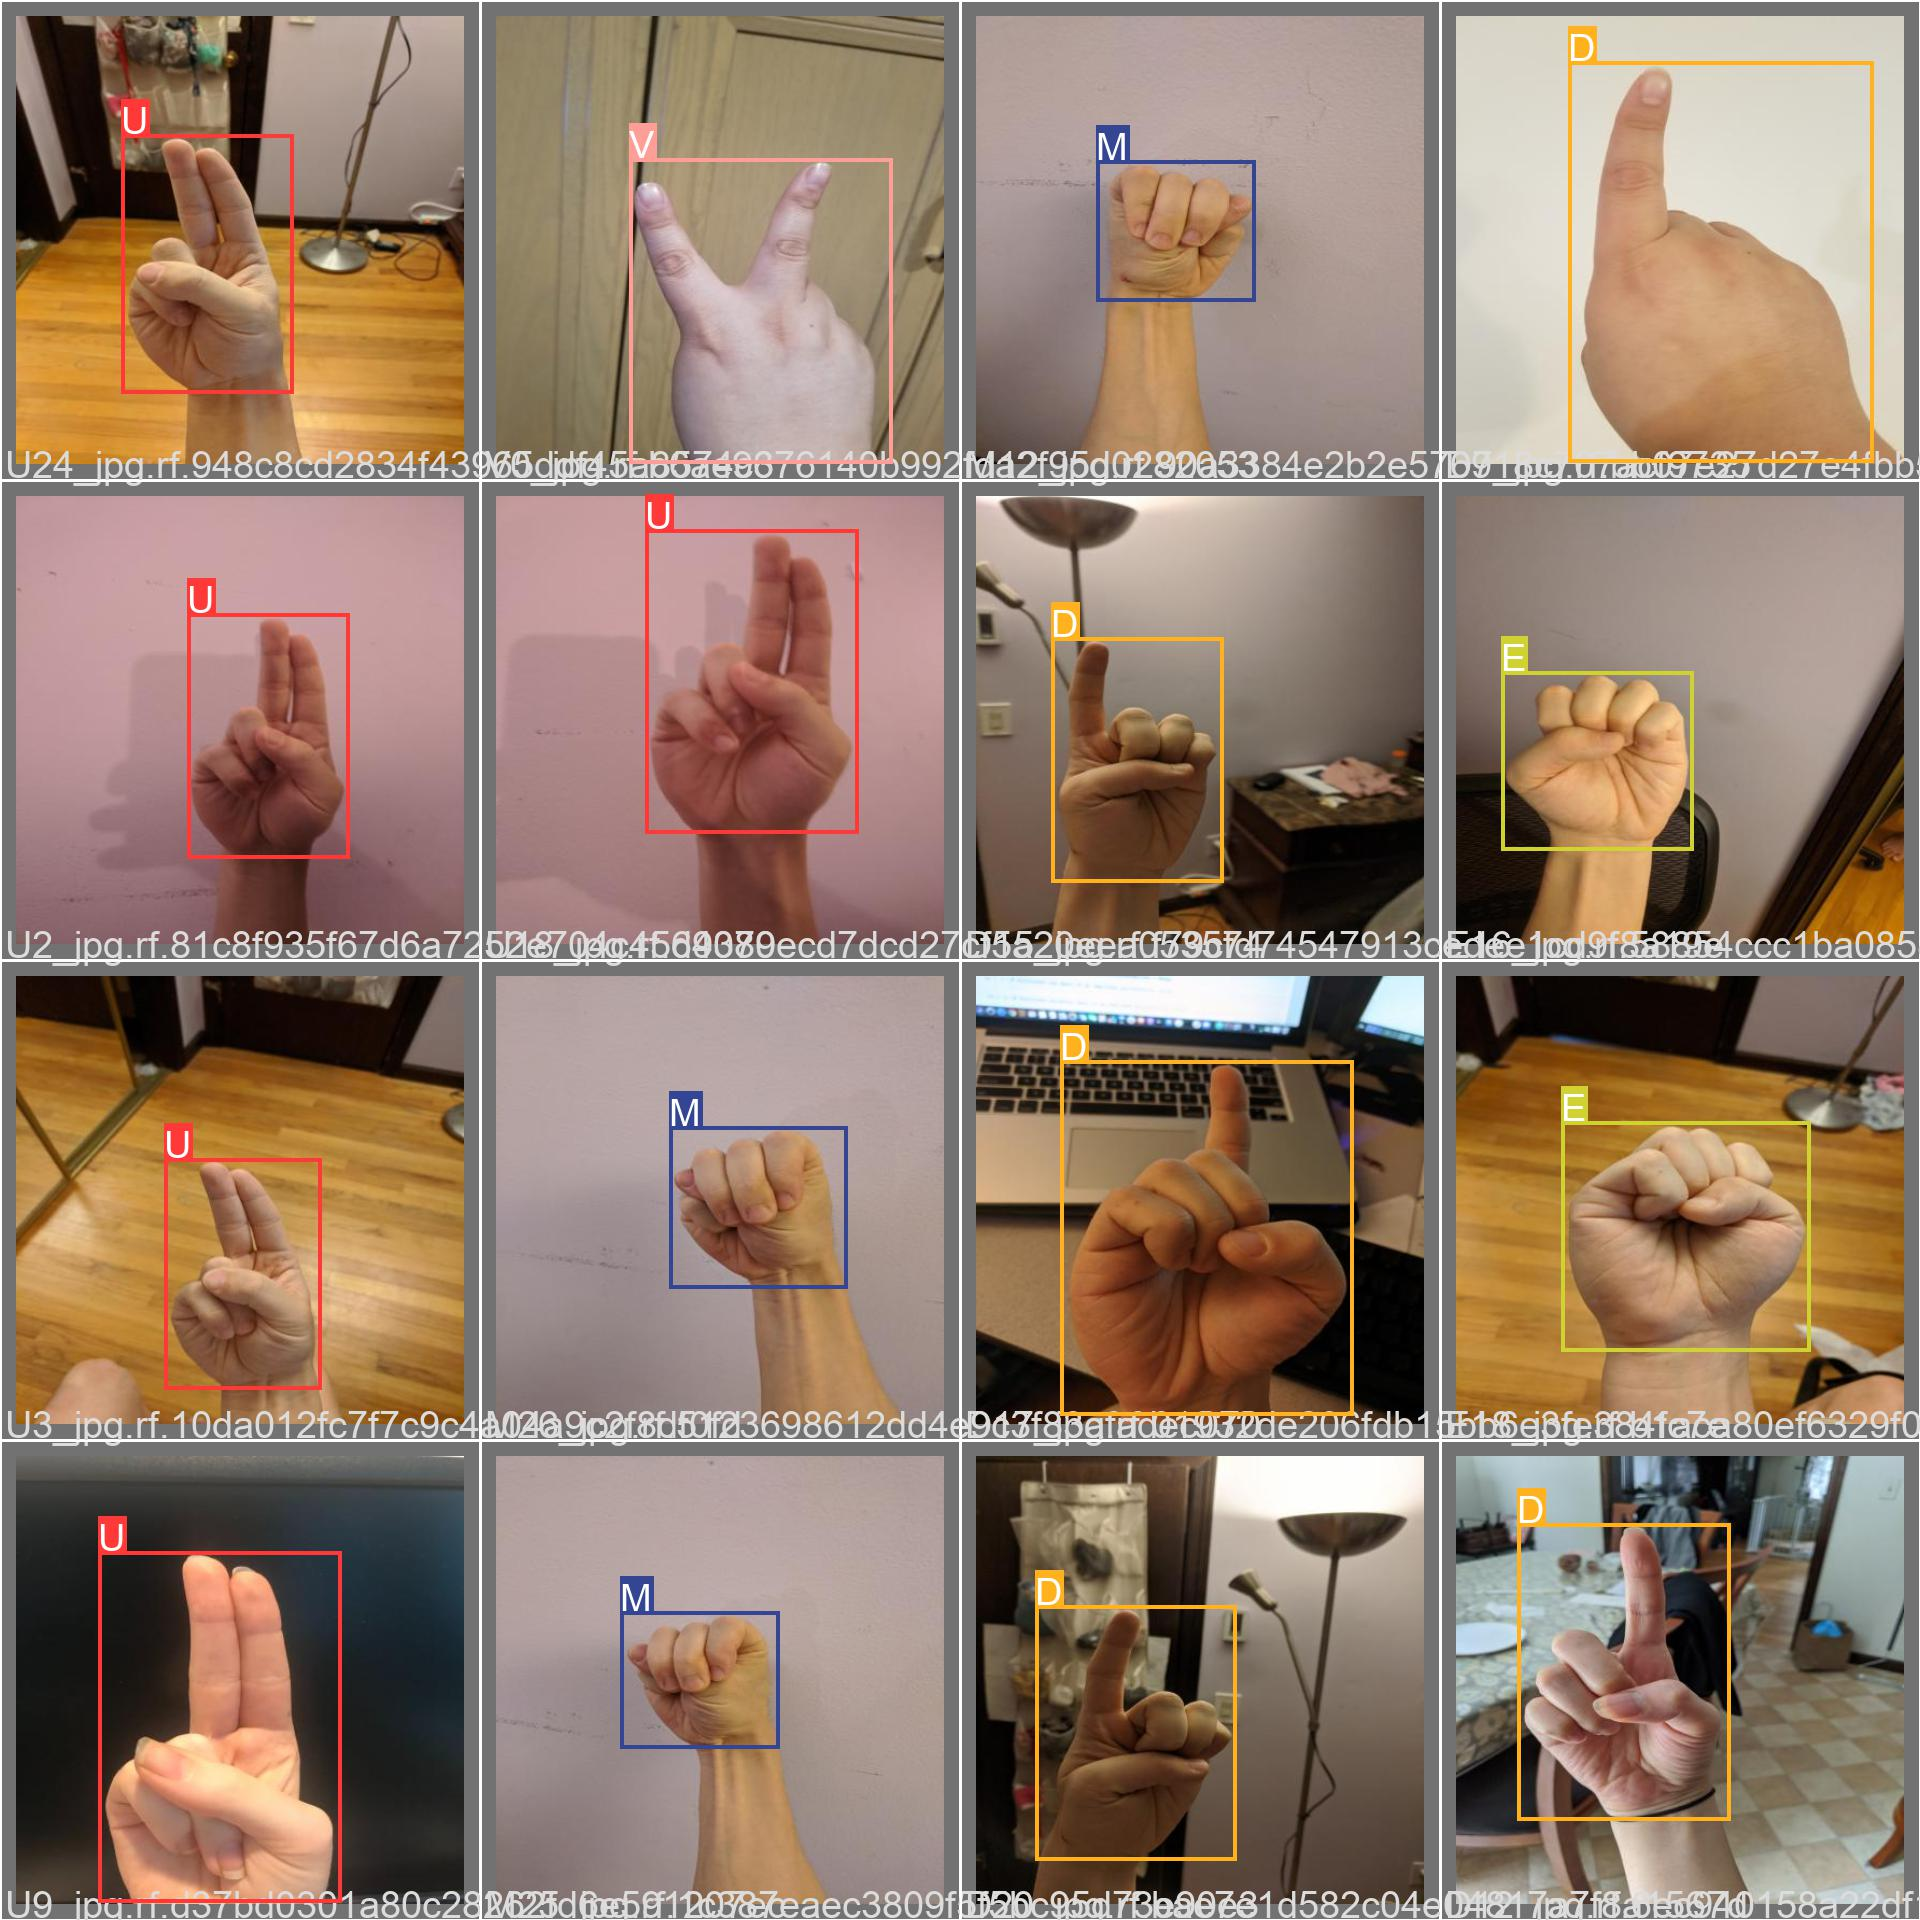

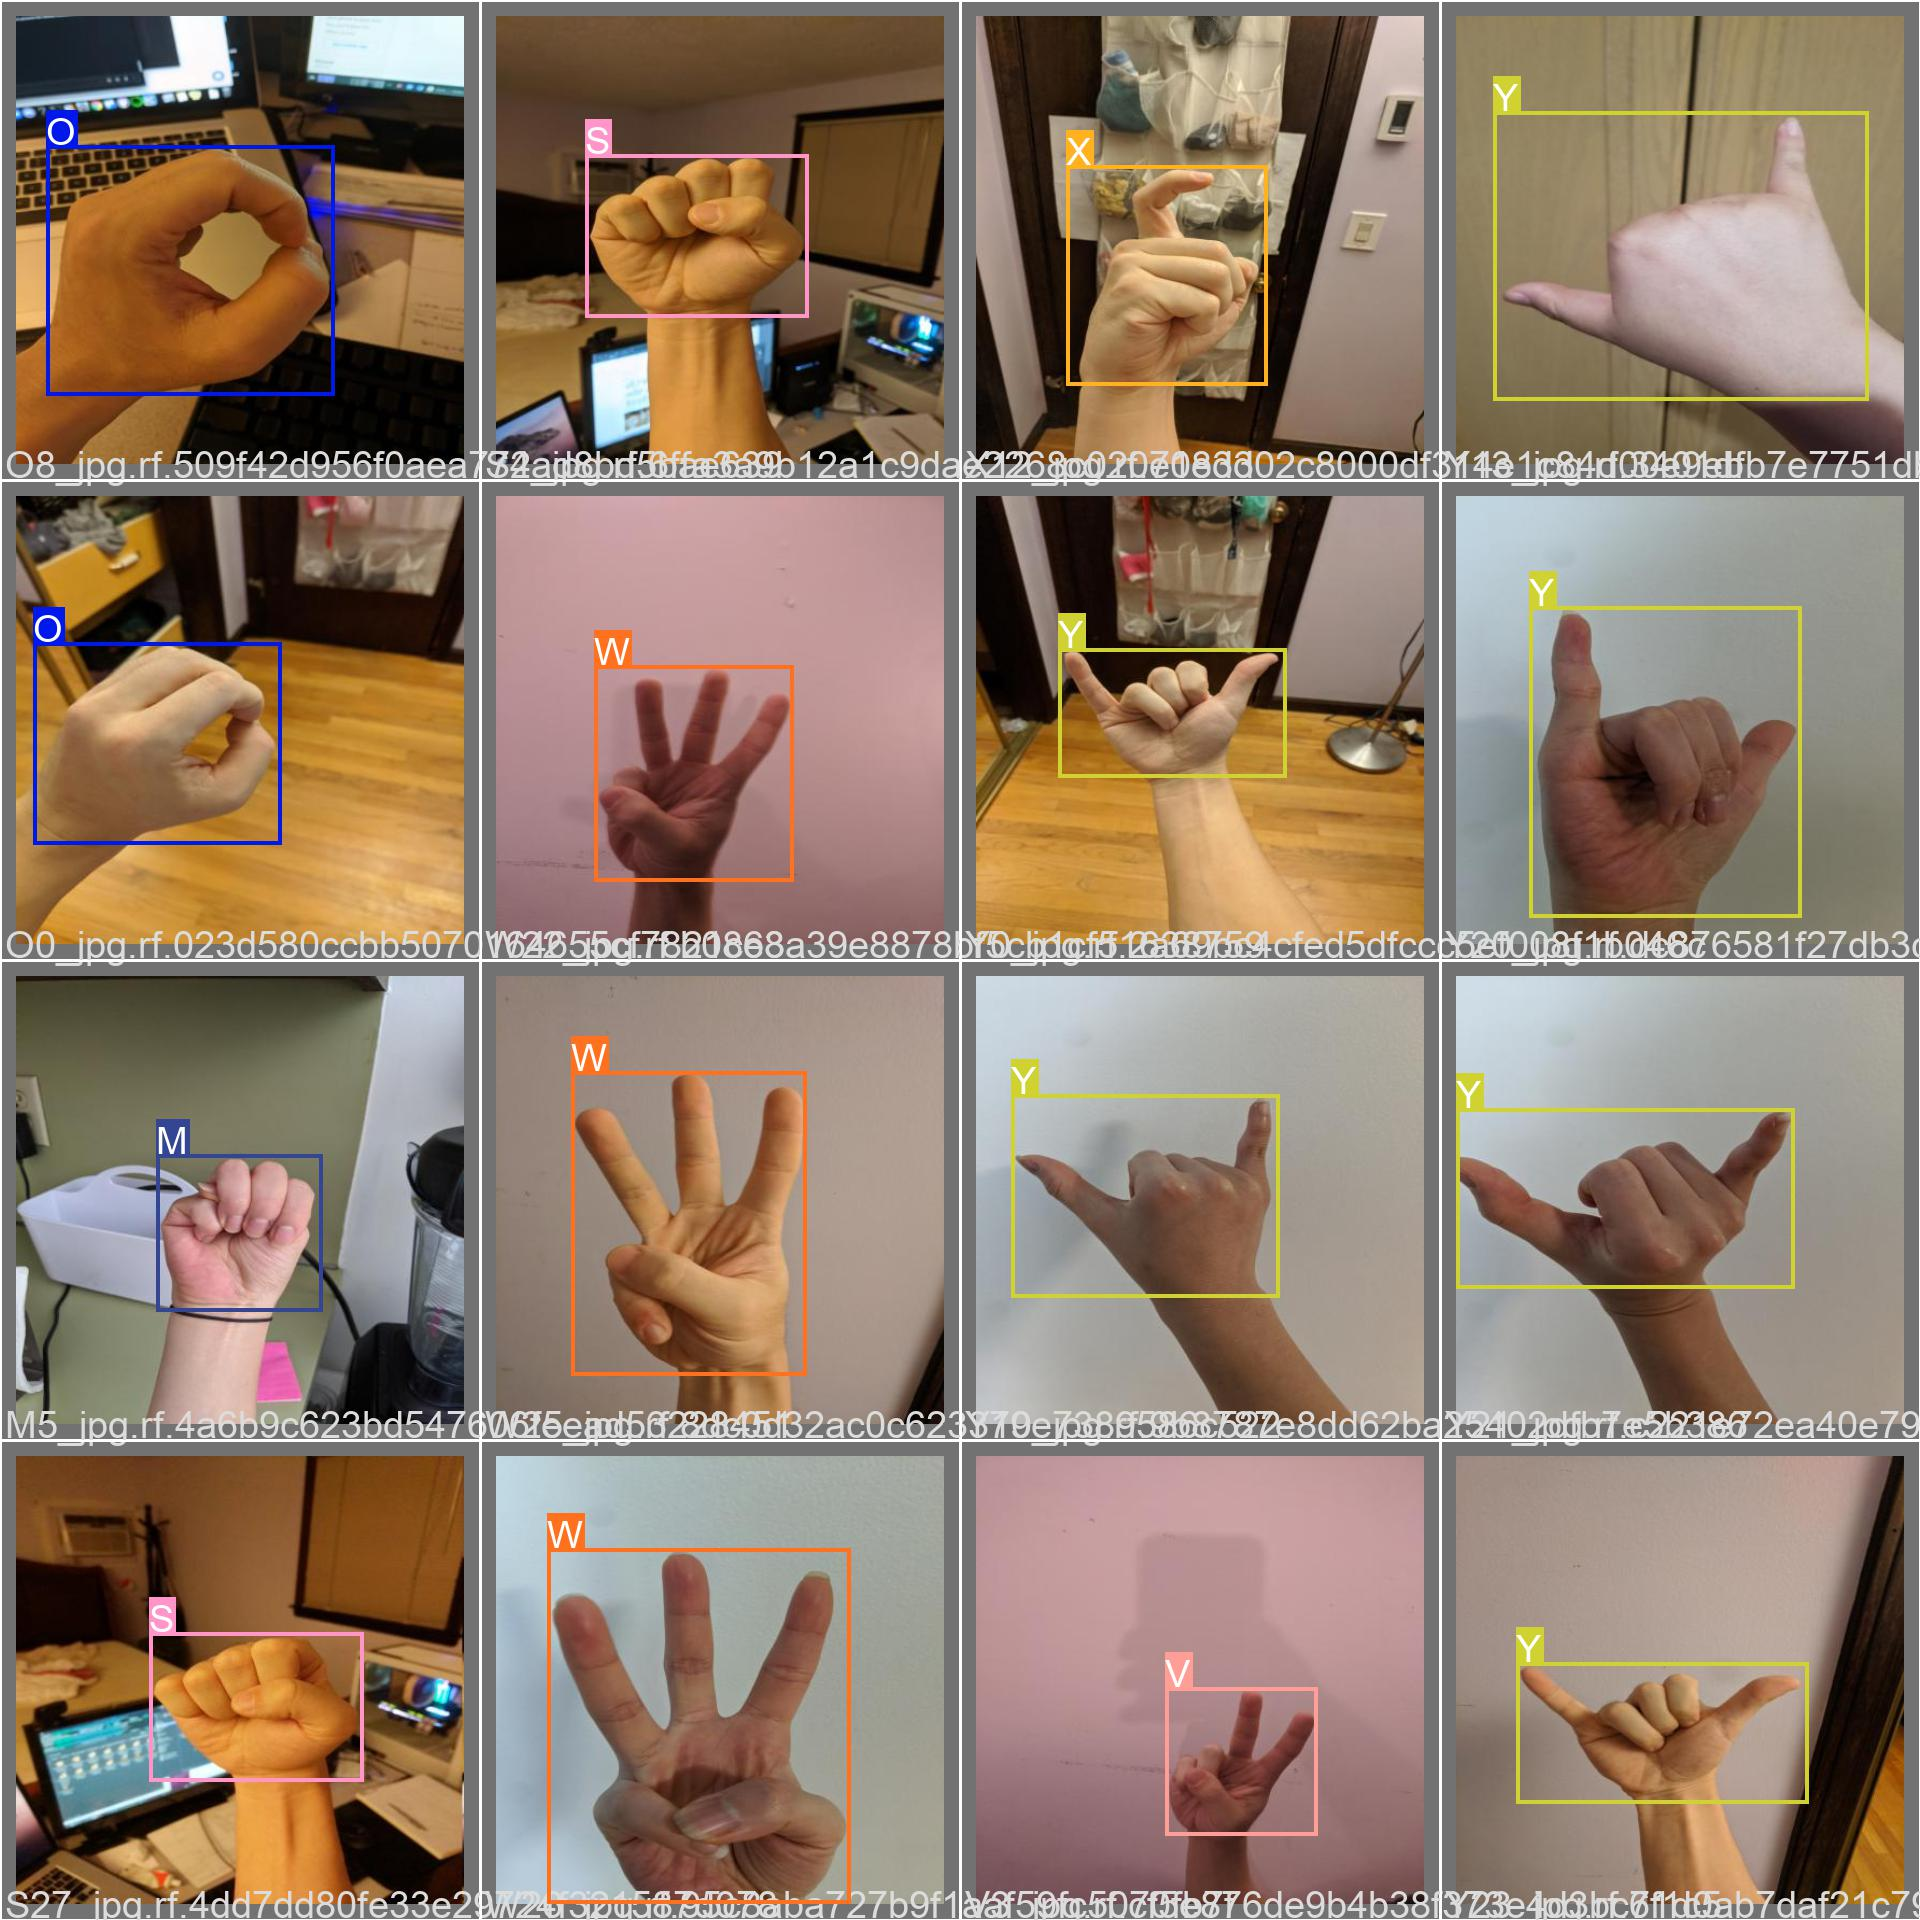

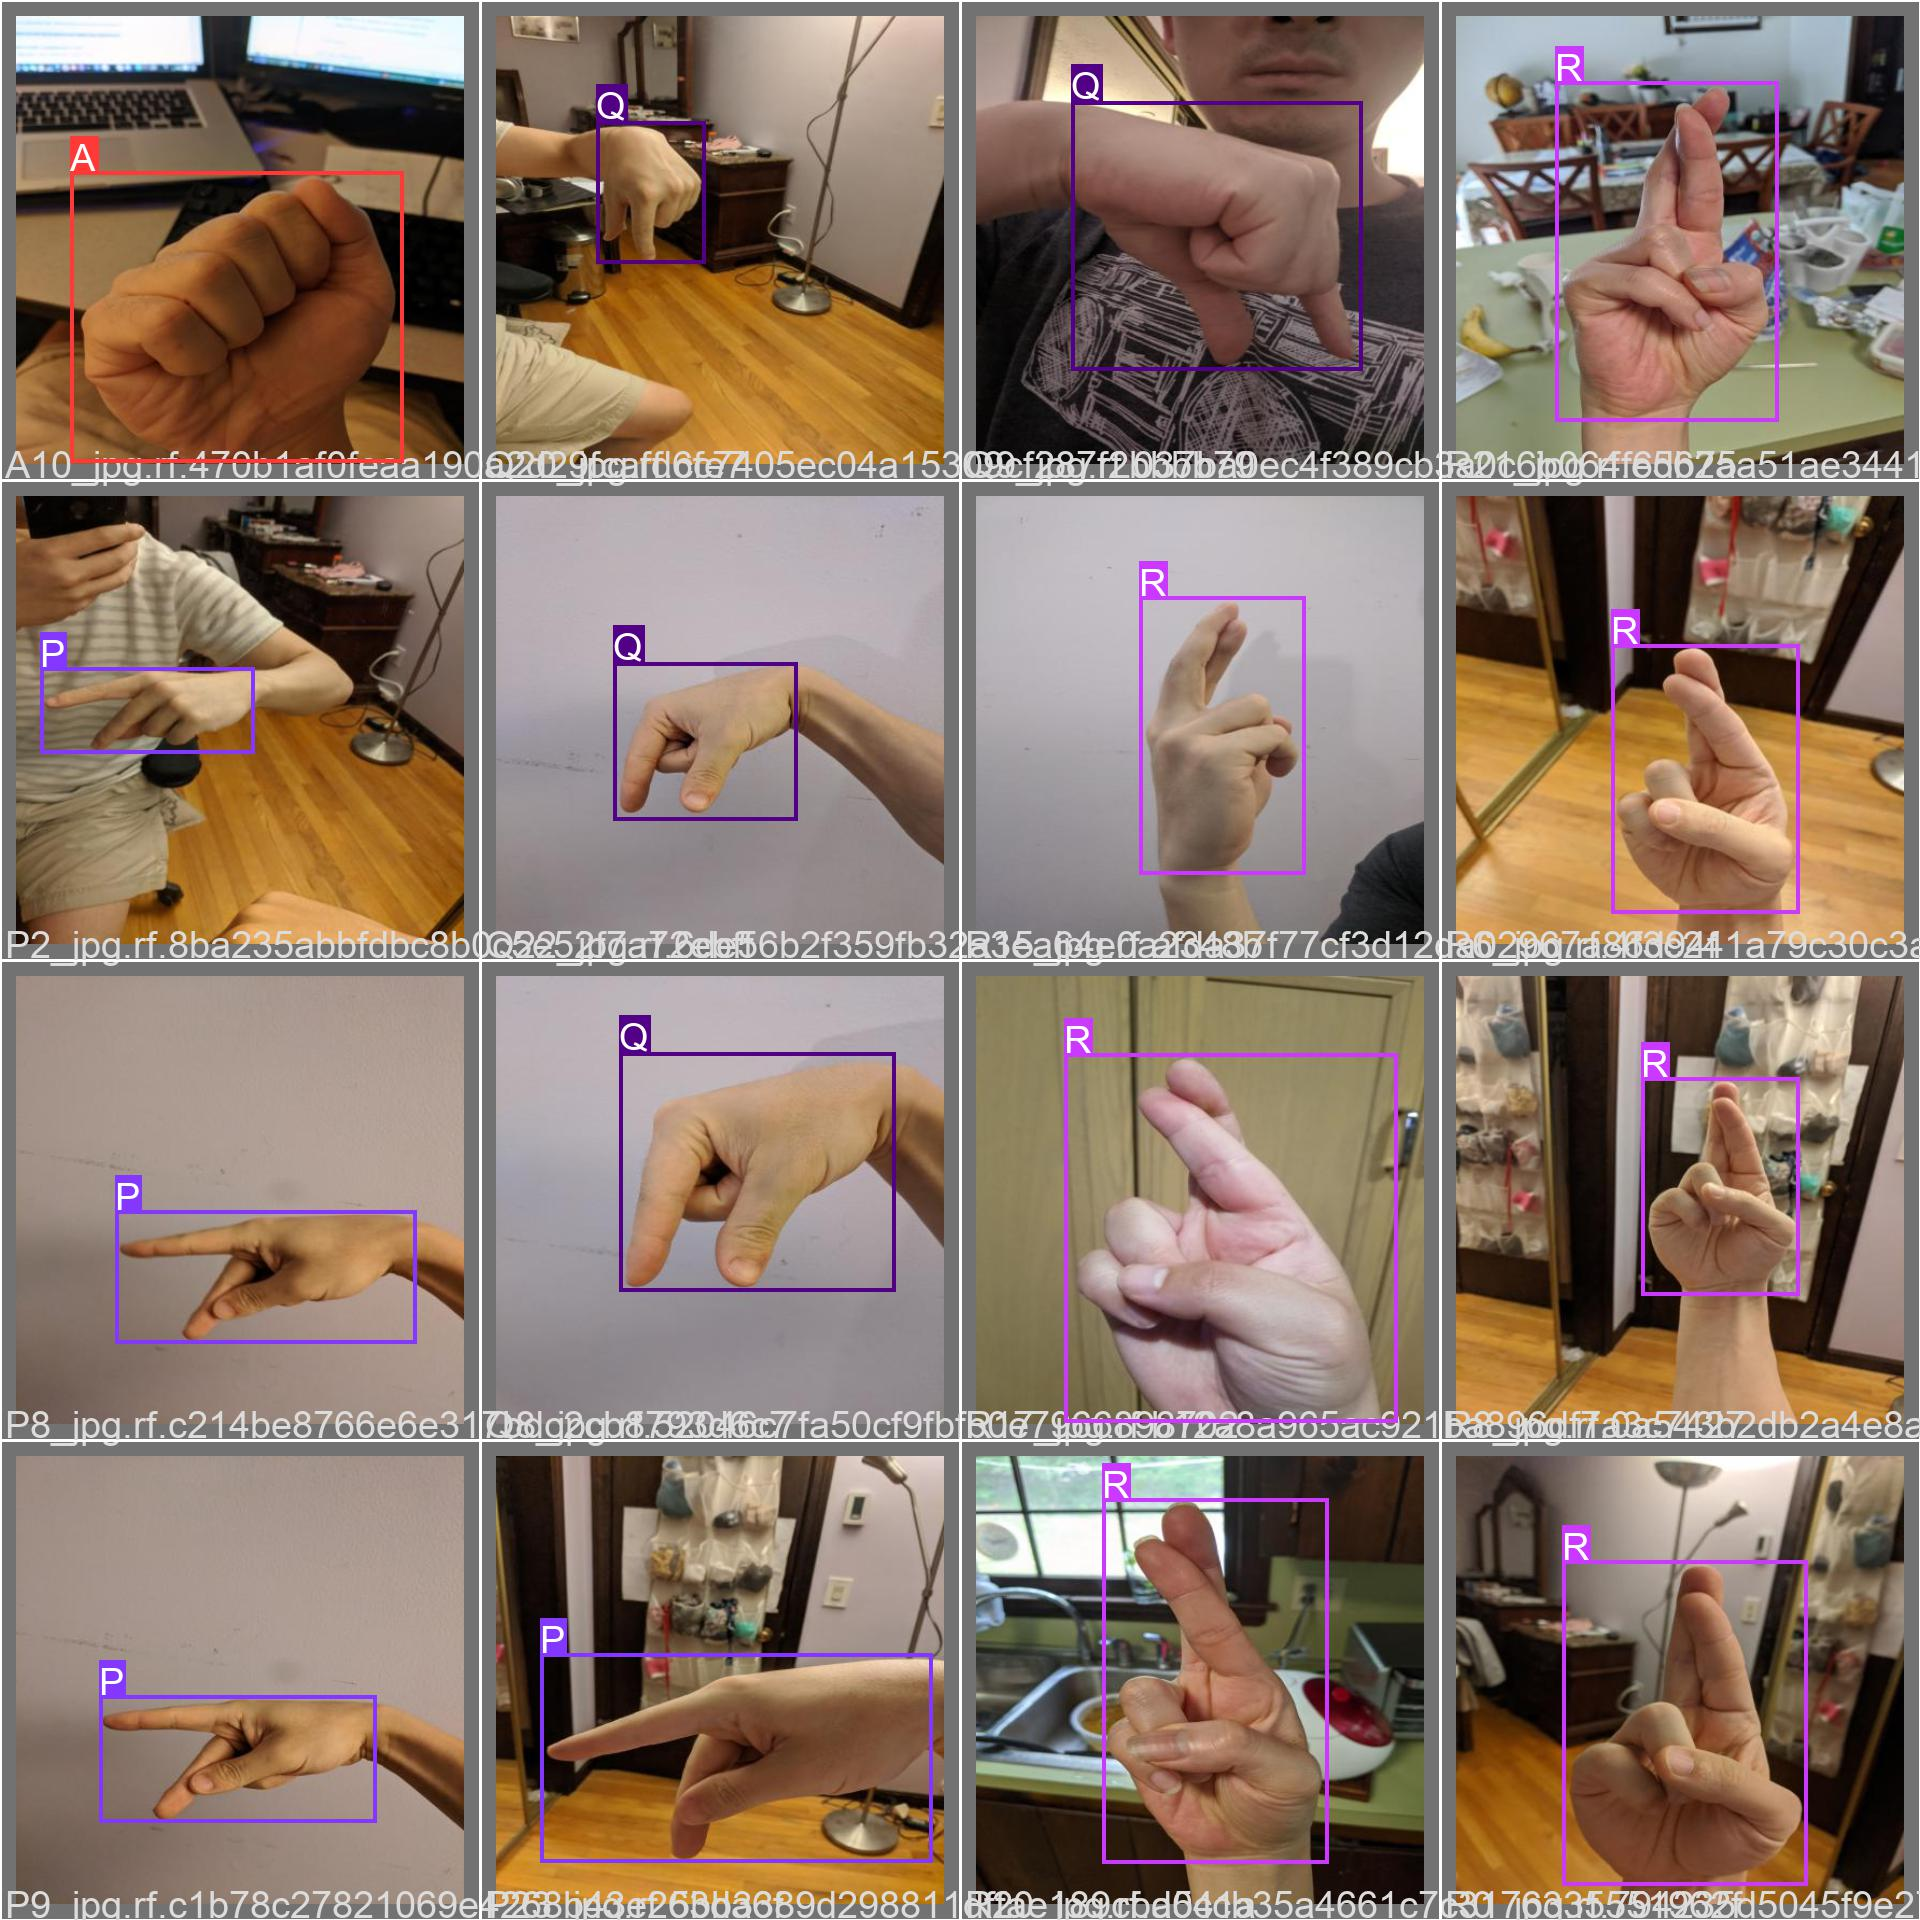

In [9]:
for imageName in glob.glob('/content/yolov5/runs/val/exp/*.jpg'):
    display(Image(filename=imageName, width=1000, height=1000))
    print('\n')

## **4.** Test

In [ ]:
!python /content/yolov5/detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 448 --conf 0.5 --source /content/test/images --line-thickness 3

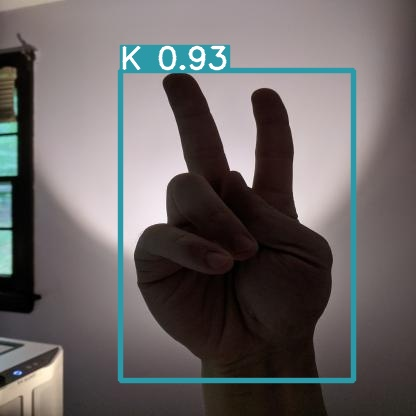

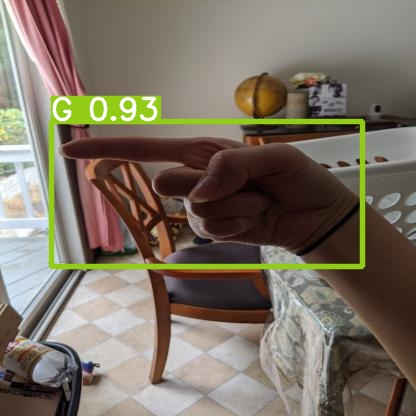

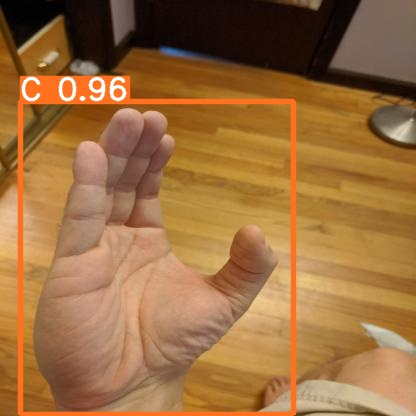

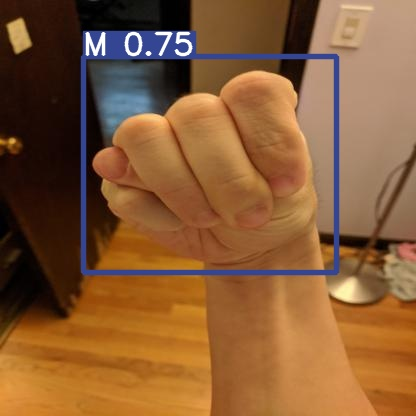

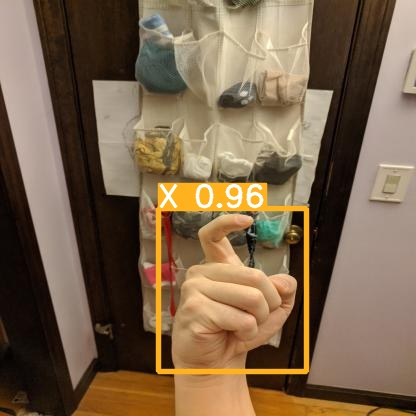

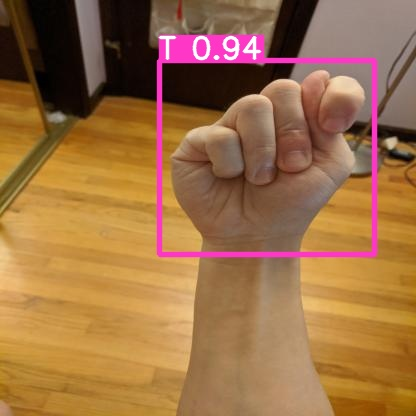

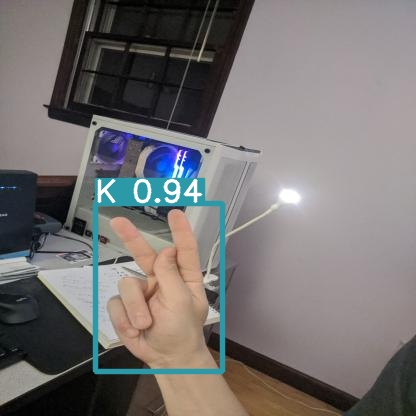

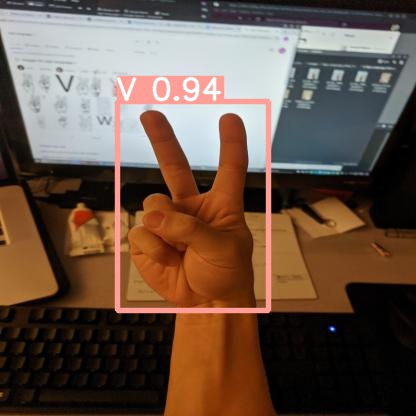

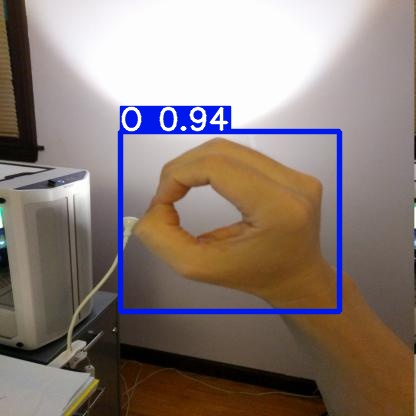

In [11]:
count = 0
max_display = 10

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'):
    count += 1
    if count == max_display:
        break;
    
    display(Image(filename=imageName, width=300, height=300))
    print("\n")

## **5.** Export

In [ ]:
# Zip the YOLOv5 folder in order to download it
!zip -r yolov5.zip yolov5/

# and download manually:
#   * 'README.robotflow.txt'
#   * 'data.yaml'
#   * 'yolov5.zip'
#   * 'yolov5s.pt'
#   * this notebook